# TEAM B7 Design of Alloy with High Strength to Weight Ratio
(Maximum stress prediction)

#Importing required library

In [ ]:
!pip install CBFV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 6.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from CBFV import composition
from CBFV.composition import generate_features
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import cross_val_score

### Reading train and test data .csv files and storing in dataframe

In [ ]:
df = pd.read_excel('/content/maxStress_target.xlsx')
df_train, df_test = train_test_split(df, test_size=0.1, random_state=42)


In [ ]:
df_train= df_train[['formula','target']]
df_test= df_test[['formula','target']]

In [ ]:
df_train

,formula,target
12,Al20(CoCrCuFeMnNiTiV)80,2016
25,AlCoCrCuNiTiY,1192
61,AlNb1.5Ta0.5Ti1.5Zr0.5,1367
56,AlCuFeNiTi,1617
9,Al1.125CuFe0.75NiTi1.125,1326
40,AlCoCrFeNiSi0.4,2444
13,Al22.5Cu20Fe15Ni20Ti22.5,1326
34,AlCoCrFeNb0.25Ni,3008
50,AlCrCuFeNiTi,1219
3,Al0.4Hf0.6NbTaTiZr,2269


### To construct the desired feature space

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving f3_revised.csv to f3_revised.csv


In [ ]:
!mv f3_revised.csv /usr/local/lib/python3.10/dist-packages/CBFV/element_properties/

### Featurization using CBFV and considering only relevant features

In [ ]:
# FEATURIZATION
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train,elem_prop='f3_revised',drop_duplicates=False,extend_features=True)
X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test,elem_prop='f3_revised',drop_duplicates=False,extend_features=True)


Processing Input Data: 100%|██████████| 57/57 [00:00<00:00, 5490.68it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 57/57 [00:00<00:00, 3436.27it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 7/7 [00:00<00:00, 3375.89it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 7/7 [00:00<00:00, 3996.21it/s]


	Creating Pandas Objects...


In [ ]:
X_train_unscaled

,avg_Atomic_Radius,avg_Pauling_Electronegativity,avg_number_of_valence_electrons,avg_Cohesive_energy_ev_atom,avg_Bulk_modulus_RT_Gpa,avg_Elastic_modulus_RT_Gpa,avg_Shear_modulus_RT_Gpa,avg_Melting_point_(K),avg_rate_shear_mod_Mpa_perK,avg_Solid_Solubility_atpct,...,mode_Bulk_modulus_RT_Gpa,mode_Elastic_modulus_RT_Gpa,mode_Shear_modulus_RT_Gpa,mode_Melting_point_(K),mode_rate_shear_mod_Mpa_perK,mode_Solid_Solubility_atpct,mode_lattice_constant_A,mode_BEC_percm3,mode_Av.Valence_bond_strength_ev,mode_EngelZ_e/a
0,1.582424,1.733636,7.363636,4.197273,150.181818,180.424242,68.179487,1773.998485,-20.866912,20.727273,...,110.0,116.0,26.0,1356.15,-26.020479,5.0,2.51,2.240000e-21,1.397,4.0
1,1.597143,1.674286,6.571429,4.147143,126.714286,152.571429,58.571429,1663.292857,-18.631005,22.942857,...,41.0,64.0,26.0,933.15,-26.020479,0.1,2.51,9.000000e-22,2.212,3.0
2,1.764000,1.547000,4.200000,5.839000,128.300000,105.700000,40.000000,2128.350000,-10.815375,83.920000,...,110.0,105.0,38.0,1933.15,-11.397600,100.0,2.95,2.240000e-21,2.930,4.0
3,1.488000,1.758000,7.200000,4.090000,135.200000,145.400000,55.200000,1551.350000,-19.647092,27.860000,...,76.0,70.0,26.0,933.15,-23.332935,5.0,2.87,1.810000e-21,1.851,3.0
4,1.483500,1.745250,6.975000,4.082000,131.350000,139.500000,52.850000,1532.600000,-19.259556,30.395000,...,76.0,70.0,26.0,933.15,-19.766837,19.6,2.95,1.810000e-21,2.494,3.0
5,1.454444,1.787037,6.962963,4.157778,149.259259,182.925926,73.703704,1673.890741,-22.554963,12.111111,...,76.0,70.0,26.0,933.15,-26.020479,5.0,2.51,1.810000e-21,1.851,3.0
6,1.483500,1.745250,6.975000,4.082000,131.350000,139.500000,52.850000,1532.600000,-19.259556,30.395000,...,76.0,70.0,26.0,933.15,-19.766837,19.6,2.95,1.810000e-21,2.494,3.0
7,1.505714,1.769524,7.095238,4.284286,154.000000,189.571429,73.047619,1724.007143,-22.049255,16.952381,...,76.0,70.0,26.0,933.15,-26.020479,5.0,2.51,1.810000e-21,1.851,3.0
8,1.516667,1.741667,7.000000,4.091667,139.333333,167.666667,65.166667,1647.816667,-20.709323,27.383333,...,76.0,70.0,26.0,933.15,-26.020479,5.0,2.87,1.810000e-21,1.851,3.0
9,1.904000,1.478800,4.320000,6.398000,133.480000,109.960000,42.480000,2388.390000,-8.967445,93.568000,...,91.0,68.0,33.0,1933.15,-11.397600,100.0,2.95,1.720000e-21,2.930,4.0


### Selecting the features in the form of weighted average for each alloy
$$
  \sum_{i=1}^{n} c_if_i \
$$
  where $c_i$ represents the concentration of each element i (Al, Cu, Co etc) in the atom percentage present in   the alloy and $f_i$ represents its elemental property (such as atomic radius, melting point etc.).




In [ ]:
columns=col= (X_train_unscaled.columns)

In [ ]:
X_train_unscaled_avg = X_train_unscaled[columns]
X_test_unscaled_avg = X_test_unscaled[columns]
train_data_avg = X_train_unscaled_avg.join(y_train)
test_data_avg = X_test_unscaled_avg.join(y_test)
total_data_avg = pd.concat([train_data_avg,test_data_avg])
total_data_avg.shape
print('shape of the features space:',X_train_unscaled_avg.shape)

shape of the features space: (57, 84)


In [ ]:
total_data_avg.shape

(64, 85)

### Scaling using standard scaler

In [ ]:
# Instantiate the standard scaler
scaler = StandardScaler()
# zero mean and unit variance
X_train = scaler.fit_transform(X_train_unscaled_avg)
X_test = scaler.transform(X_test_unscaled_avg)

### Machine Learning Models Performance Evaluation Helper Functions

In [ ]:
def model_evaluation(y_actual,y_predict, label = None,model='None'):
    df = pd.DataFrame([{'mae':mean_absolute_error(y_actual,y_predict),
                        'rmse':mean_squared_error(y_actual,y_predict,squared=False),
                        'r2score':r2_score(y_actual,y_predict),
                        'model':model
                        }])
    if label:
        df.index = [label]

    return df

def model_evaluation_result(y_Train,y_train_predict,y_Test,y_test_predict,model='None'):
    result = pd.concat([model_evaluation(y_Train,y_train_predict,'Train',model),
                    model_evaluation(y_Test,y_test_predict, 'Test',model)])
    return result


def plot_model_performance(y_train,y_train_predict,y_test,y_test_predict,r2_train,r2_test):
    plt.figure(figsize=(8,8))
    plt.scatter(y_train,y_train_predict, s=160,alpha=0.7, label='Training Data ($r^2$ ={0:.3f})'.format(r2_train))
    plt.scatter(y_test,y_test_predict,s=160, alpha=0.7, label='Test Data ($r^2$ ={0:.3f})'.format(r2_test))
    # plt.plot(y_test,y_test,'--',dashes=(5, 6),linewidth=2,c='grey',label = 'Ideal Fit')
    plt.axline((0, 0), (1200, 1200), linewidth=2, color='k',linestyle='dashed',label='ideal fit')
    plt.xlabel('Actual Stress_max of Al alloy(MPa)', size=16)
    plt.ylabel('Predicted Stress_max of Al alloy(MPa))',size=16)
    plt.tick_params(labelsize=14)
    plt.xlim((0,4000))
    plt.ylim((0,4000))
    plt.legend(prop={'size': 14})
    plt.minorticks_on()
    plt.tick_params(labelsize=16)
    plt.tick_params(direction='in',which='major', length=15, bottom=True, top=True, left=True, right=True,colors='k')
    plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True,colors='k')


### Support Vector Regression with grid search group kfold

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.metrics import r2_score
import numpy as np

rng_seed = 20

# Create the base model with SVR
base_model = SVR()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 4, 5]  # Only relevant for 'poly' kernel
}

# Instantiate GroupKFold with number of splits = 5
gkf = GroupKFold(n_splits=5)

# Instantiate GridSearchCV with the base model and parameter grid
svr_gs = GridSearchCV(
    base_model,
    param_grid,
    scoring='neg_mean_squared_error',
    cv=gkf
)

# Fit training data
svr_gs.fit(X_train, y_train, groups=formulae_train)

# Best estimator
print(svr_gs.best_estimator_)

svr_gs_best = svr_gs.best_estimator_

# Fit the best estimator on the entire training data
svr_gs_best.fit(X_train, y_train)

# Predict y_train and y_test
y_train_predict = svr_gs_best.predict(X_train)
y_test_predict = svr_gs_best.predict(X_test)

# Calculate R^2 scores
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

print('r2score_train:', r2_train)
print('r2score_test:', r2_test)


SVR(C=10, epsilon=0.5, kernel='linear')
r2score_train: 0.7288614576681169
r2score_test: 0.6682510900250713


### Performance Evaluation SVR

              mae        rmse   r2score model
Train  254.555007  365.024738  0.728861   SVR
Test   488.770203  597.999002  0.668251   SVR
****************************************************************************


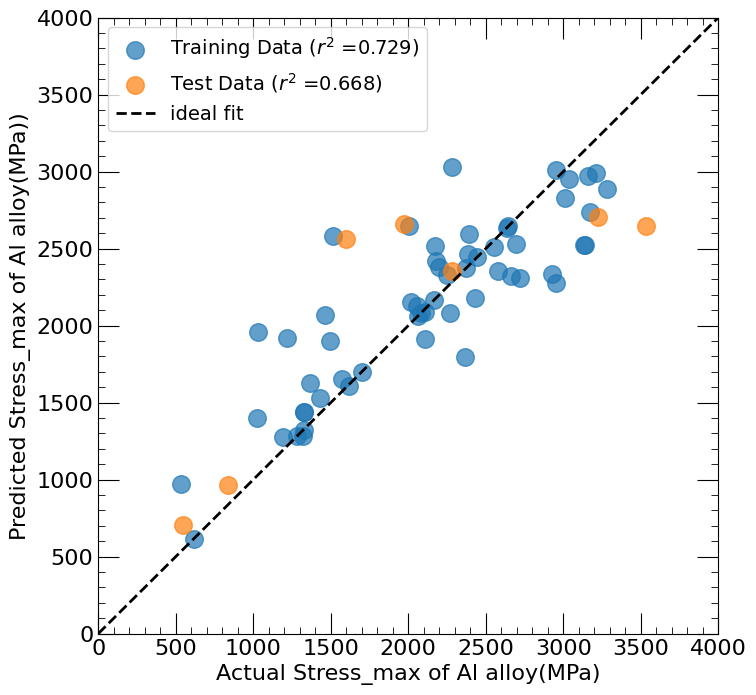

In [ ]:
print(model_evaluation_result(y_train,y_train_predict,y_test,y_test_predict,'SVR'))
print('****************************************************************************')
plot_model_performance(y_train,y_train_predict,y_test,y_test_predict,r2_train,r2_test)

#Defining function for performing bootstrapping

In [ ]:
import numpy as np
from scipy.stats import norm

# DETERMINING the mean and standard Deviation using bootstrap sampling with 100 bootstrap samples

def bootstrap_estimator(model, X_train, y_train, X_test, n_iter=100):

    bootstrap_preds = np.zeros([len(X_test), n_iter])

    index = np.arange(X_train.shape[0])

    ## set the seed to repeat the boot strapping
    np.random.seed(20)
    for i in range(n_iter):
        #sample from X_train, y_train
        index_sampled = np.random.choice(index, size=X_train.shape[0], replace=True)

        X_train_sample = pd.DataFrame(X_train).iloc[index_sampled.tolist(),:]
        y_train_sample = y_train[index_sampled]

        #model.fit(X_train_sample, y_train_sample)
        model.fit(X_train_sample, y_train_sample)

        #pred_i = model.predict(X_test)

        pred_i = model.predict(X_test)
        #print('pred_i:', pred_i)

        bootstrap_preds[:,i] = pred_i
        #print(bootstrap_preds)

    return(bootstrap_preds.mean(1),bootstrap_preds.std(1))






### Estimating mean and standard deviation using the helper function bootstrap_estimator

In [ ]:
## Using the hyperparmeters of the best estimator of svr model
from sklearn.ensemble import GradientBoostingRegressor
mean , std  = bootstrap_estimator(svr_gs_best, X_train, y_train, X_test, n_iter=1000)
print(pd.DataFrame([mean,std]))
mean_train , std_train  = bootstrap_estimator(svr_gs_best, X_train, y_train, X_train, n_iter=1000)

             0           1            2            3            4  \
0  2625.129824  301.396542  2649.816906  2329.716087  2547.734840   
1   196.238714  590.179092   177.721829   187.411342   179.989924   

             5           6  
0  2598.288460  549.650546  
1   239.531629  588.275858  


### plotting the uncertainties for the test data

r2 score test data: 0.6380827339839206
r2 score train data: 0.7256951601487229


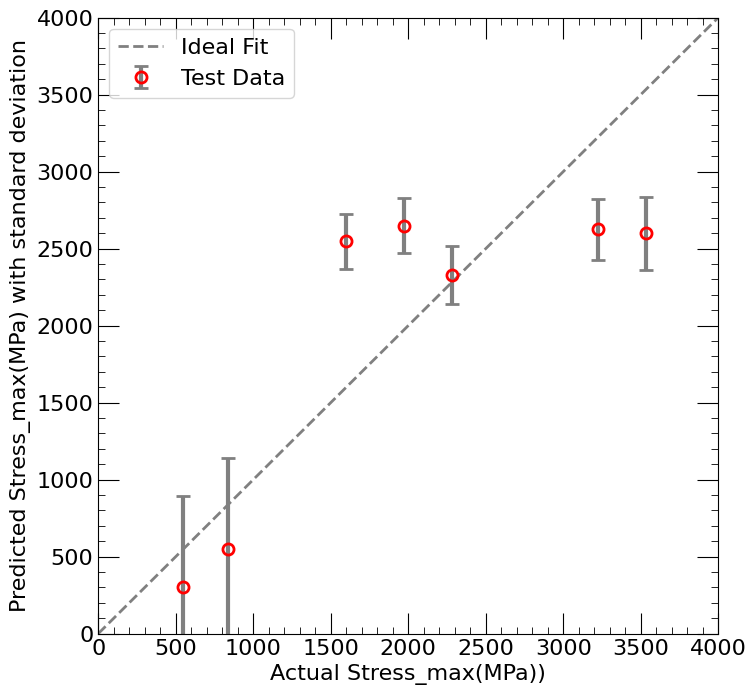

In [ ]:
plt.figure(figsize=(8,8))

plt.errorbar(y_test,mean,yerr=std,ecolor = 'grey',mfc='None', mec='red',mew=2,elinewidth= 3,ls = 'none',marker='o',markersize=8,solid_capstyle='projecting', capsize=5,label='Test Data')

plt.xlabel('Actual Stress_max(MPa))',fontsize=16)
plt.ylabel('Predicted Stress_max(MPa) with standard deviation',fontsize=16)
plt.axline((0, 0), (15, 15), linewidth=2, color='grey',linestyle='dashed',label='Ideal Fit')
plt.legend(fontsize=16)
plt.xlim(0,4000)
plt.ylim(0,4000)

plt.minorticks_on()
plt.tick_params(labelsize=16)
plt.tick_params(direction='in',which='major', length=15, bottom=True, top=True, left=True, right=True,colors='k')
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True,colors='k')

print('r2 score test data:',r2_score(y_test,mean))
print('r2 score train data:',r2_score(y_train,mean_train))


### Plotting the uncertainties for the train data

r2 score test data: 0.6380827339839206
r2 score train data: 0.7256951601487229


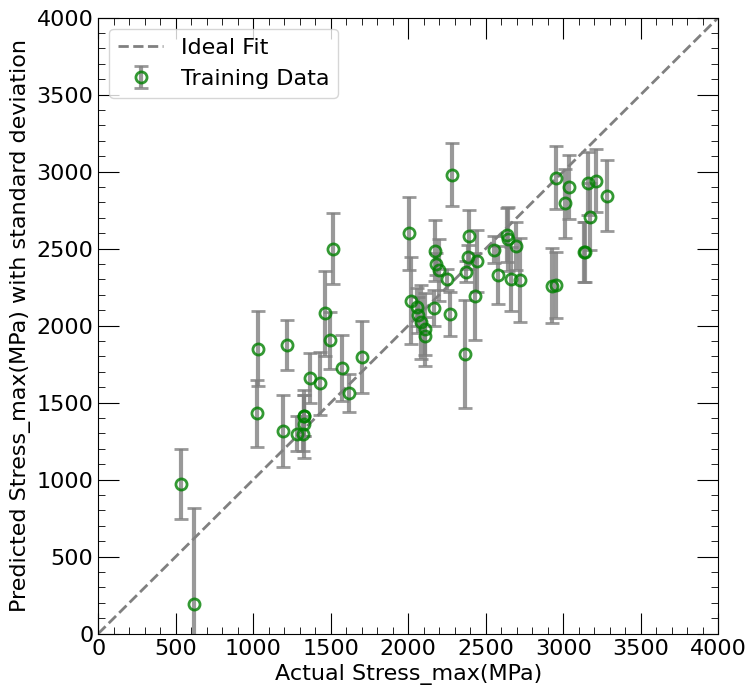

In [ ]:
plt.figure(figsize=(8,8))

plt.errorbar(y_train,mean_train,yerr=std_train,mfc='None',mec='green',mew=2,ecolor = 'grey',alpha=0.8, elinewidth= 3,ls = 'none',marker='o',markersize=8,solid_capstyle='projecting', capsize=5,label='Training Data')
plt.xlabel('Actual Stress_max(MPa)',fontsize=16)
plt.ylabel('Predicted Stress_max(MPa) with standard deviation',fontsize=16)
plt.axline((0, 0), (4000, 4000), linewidth=2, color='grey',linestyle='dashed',label='Ideal Fit')
plt.legend(fontsize=16)

plt.minorticks_on()
plt.tick_params(labelsize=16)
plt.tick_params(direction='in',which='major', length=15, bottom=True, top=True, left=True, right=True,colors='k')
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True,colors='k')


plt.xlim(0,4000)
plt.ylim(0,4000)
print('r2 score test data:',r2_score(y_test,mean))
print('r2 score train data:',r2_score(y_train,mean_train))


### Reading .csv file of composition (candidate search space)  and converting weight percent to atom percent

In [ ]:
df_test_composition = pd.read_excel('/content/Al-Vitual-Samples.xlsx')
df_test_total = df_test_composition[['formula','target']]
df_test_total.head()

,formula,target
0,Al0.8085634807793239Cr0.17Cu0.13Fe0.01Ni0.06Co...,0
1,Al0.8645886576935581Cr0.01Cu0.0Fe0.13Ni0.11Co0.03,0
2,Al0.5659041684198186Cr0.34Cu0.28Fe0.24Ni0.03Co...,0
3,Al0.1544454486656094Cr0.24Cu0.39Fe0.12Ni0.75Co...,0
4,Al0.6367265390938167Cr0.36Cu0.24Fe0.33Ni0.36Co...,0


In [ ]:
print(len(df_test_total))
df_test_final = df_test_total
df_test_final.tail()

1500


,formula,target
1495,Al0.641902473738938Cr0.04Cu0.19Fe0.34Ni0.06Co0.29,0
1496,Al0.5913981818459549Cr0.05Cu0.31Fe0.29Ni0.04Co...,0
1497,Al0.618582028502897Cr0.2Cu0.36Fe0.26Ni0.09Co0.11,0
1498,Al0.6026031746900082Cr0.06Cu0.14Fe0.12Ni0.03Co...,0
1499,Al0.11105578044578267Cr0.2Cu0.82Fe0.08Ni0.58Co...,0


In [ ]:
df_test_final = df_test_final.head(1000)
print(len(df_test_final))

1000


### Generate Features for the search space using CBFV

In [ ]:
X_test_comp, y_test_comp, formulae_test_comp, skipped_train = generate_features(df_test_final,elem_prop='f3_revised',drop_duplicates=False,extend_features=True)

Processing Input Data: 100%|██████████| 1000/1000 [00:00<00:00, 13808.36it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1000/1000 [00:00<00:00, 7964.21it/s]

	Creating Pandas Objects...


### Using only weighted average values

In [ ]:
X_test_comp_avg  = X_test_comp[columns]

In [ ]:
## to test if there is any null value
pd.DataFrame(X_test_comp_avg).isnull().sum()

avg_Atomic_Radius                   0
avg_Pauling_Electronegativity       0
avg_number_of_valence_electrons     0
avg_Cohesive_energy_ev_atom         0
avg_Bulk_modulus_RT_Gpa             0
                                   ..
mode_Solid_Solubility_atpct         0
mode_lattice_constant_A             0
mode_BEC_percm3                     0
mode_Av.Valence_bond_strength_ev    0
mode_EngelZ_e/a                     0
Length: 84, dtype: int64

### Normalization and Prediction
### for predicting mean and std deviation of candidate space we have used entire dataset for training keeping the hyperparameters same for the model

In [ ]:
X_train_all = np.concatenate((X_train_unscaled_avg,X_test_unscaled_avg),axis = 0)
y_train_all = np.concatenate((y_train,y_test),axis=0)

scaler = StandardScaler()
X_train_all_scaled = scaler.fit_transform(X_train_all) ## fit and transform training data and
X_test_comp_avg_scaled  = scaler.transform(X_test_comp_avg) # transform test data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
# Estimating mean and standard deviation for all the available experimental data
mean_train_all , std_train_all  = bootstrap_estimator(svr_gs_best, X_train_all_scaled, y_train_all, X_train_all_scaled, n_iter=1000)


r2 score train data: 0.7291381560244707


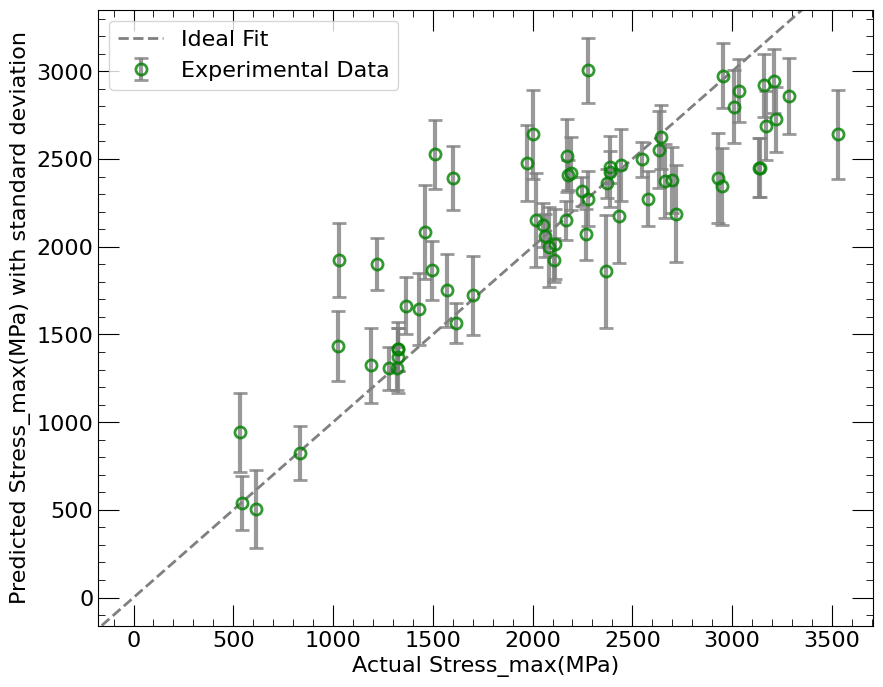

In [ ]:
plt.figure(figsize=(10,8))
plt.errorbar(y_train_all,mean_train_all,yerr=std_train_all,mfc='None',mec='green',mew=2,ecolor = 'grey',alpha=0.8, elinewidth= 3,ls = 'none',marker='o',markersize=8,solid_capstyle='projecting', capsize=5,label='Experimental Data')
plt.xlabel('Actual Stress_max(MPa)',fontsize=16)
plt.ylabel('Predicted Stress_max(MPa) with standard deviation',fontsize=16)
plt.axline((0, 0), (15, 15), linewidth=2, color='grey',linestyle='dashed',label='Ideal Fit')
plt.legend(fontsize=16)

plt.minorticks_on()
plt.tick_params(labelsize=16)
plt.tick_params(direction='in',which='major', length=15, bottom=True, top=True, left=True, right=True,colors='k')
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True,colors='k')
print('r2 score train data:',r2_score(y_train_all,mean_train_all))

#Defining function for EI calculation

In [ ]:
def Expected_Improvement(X_test, X_train_all, y_train_all, model, xi=0.01):


    mu_x, sigma_x = bootstrap_estimator(model, X_train_all, y_train_all, X_test, n_iter=1000)
    mu_max = np.max(y_train_all)
    diff = (mu_x-mu_max-xi)
    z = diff/sigma_x
    ei = diff*norm.cdf(z)+sigma_x*norm.pdf(z)
    ei[sigma_x == 0.0] = 0.
    return(ei,mu_x,sigma_x)

### Calculating EI

In [ ]:
ei,predicted_property,std = Expected_Improvement(X_test_comp_avg_scaled, X_train_all_scaled, y_train_all,svr_gs_best,xi=0.01)


### Saving the Predicted value and EI in .csv file


In [ ]:
df_predict = pd.DataFrame({"ei":ei, "predicted_property":predicted_property, "std":std})
df_predict_final = df_test_final.join(df_predict)

df_predict_final_sorted = df_predict_final.sort_values('ei',ascending=True)
df_predict_final_sorted.to_csv('/content/max_stress_pred.csv')
df_predict_final_sorted[0:10]


,formula,target,ei,predicted_property,std
311,Al0.840484803003078Cr0.0Cu0.08Fe0.06Ni0.07Co0.08,0,2.982184e-14,1351.163018,274.004994
570,Al0.896434008923085Cr0.0Cu0.08Fe0.1Ni0.08Co0.06,0,3.862088e-14,1364.800210,273.386405
284,Al0.8959713786100005Cr0.0Cu0.05Fe0.1Ni0.07Co0.07,0,5.602856e-14,1377.419853,273.370406
459,Al0.8326746335009174Cr0.0Cu0.1Fe0.11Ni0.07Co0.1,0,1.698340e-13,1403.272072,274.869185
663,Al0.8553897870850017Cr0.0Cu0.07Fe0.12Ni0.05Co0.11,0,2.762715e-13,1414.739607,275.553062
905,Al0.7032991220459127Cr0.0Cu0.26Fe0.15Ni0.02Co0.15,0,3.108766e-13,1484.914041,267.071341
767,Al0.43314543552128537Cr0.07Cu0.45Fe0.22Ni0.3Co...,0,3.357162e-13,1849.436322,220.470519
78,Al0.7008741216178679Cr0.09Cu0.3Fe0.02Ni0.02Co0.01,0,5.323044e-13,1414.991616,278.486060
5,Al0.7984177671915237Cr0.02Cu0.17Fe0.12Ni0.0Co0.02,0,5.601799e-13,1434.319698,276.216736
705,Al0.8142237673858577Cr0.02Cu0.15Fe0.03Ni0.11Co...,0,8.482335e-13,1422.782318,279.633997
